In [1]:
# import all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_context('talk')
sns.set_palette('Paired')
sns.set(style = 'darkgrid')

In [4]:
# load the dataset
data = pd.read_csv('sample_data/heart.csv')

In [5]:
# display first few records
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# show the number of records and the number of features
data.shape

(303, 14)

In [7]:
# get a basic understanding of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# summarise the count, mean, standard deviation, min and max for numeric features
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# check for null values
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
# show duplicate rows in the dataset
data[data.duplicated(keep = False)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
# drop the duplicated row
data.drop_duplicates(keep = 'first', inplace = True)

In [12]:
# check correlations between all variables
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


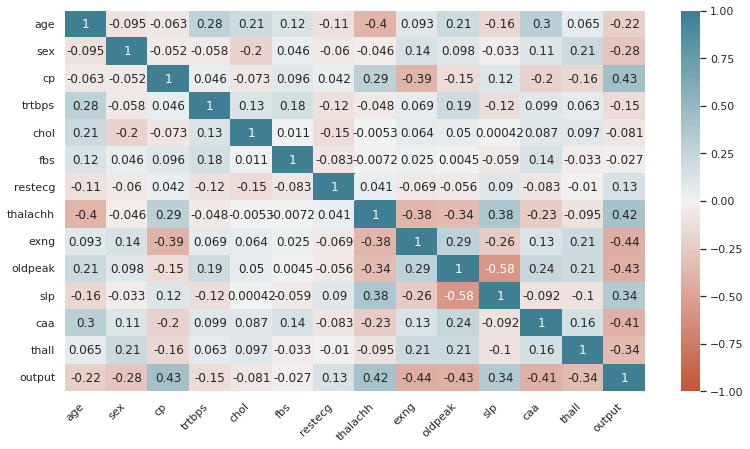

In [13]:
# plot corr function
plt.figure(figsize = (13, 7))
ax = sns.heatmap(data.corr(), vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(20, 220, n = 200), annot = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.show()

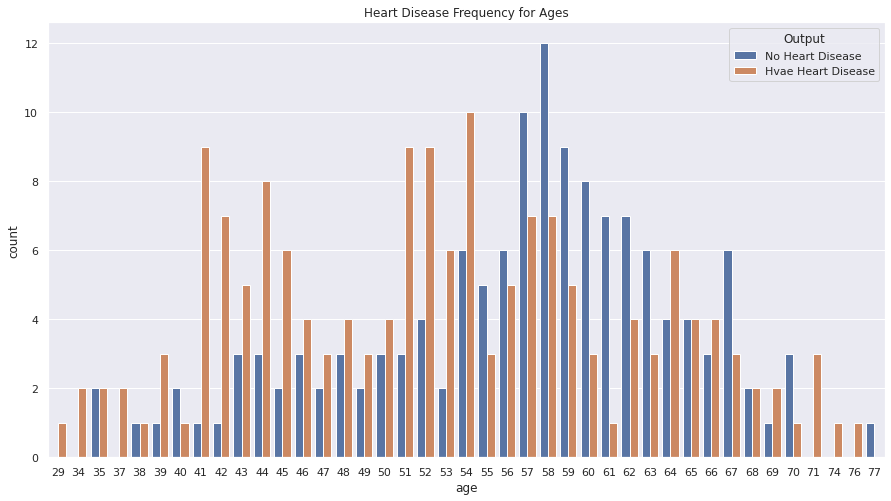

In [14]:
plt.figure(figsize = (15, 8))
sns.countplot(x = 'age', hue = 'output', data = data).set_title('Heart Disease Frequency for Ages')
plt.legend(title = 'Output', loc = 'upper right', labels = ['No Heart Disease', 'Hvae Heart Disease'])
plt.show()

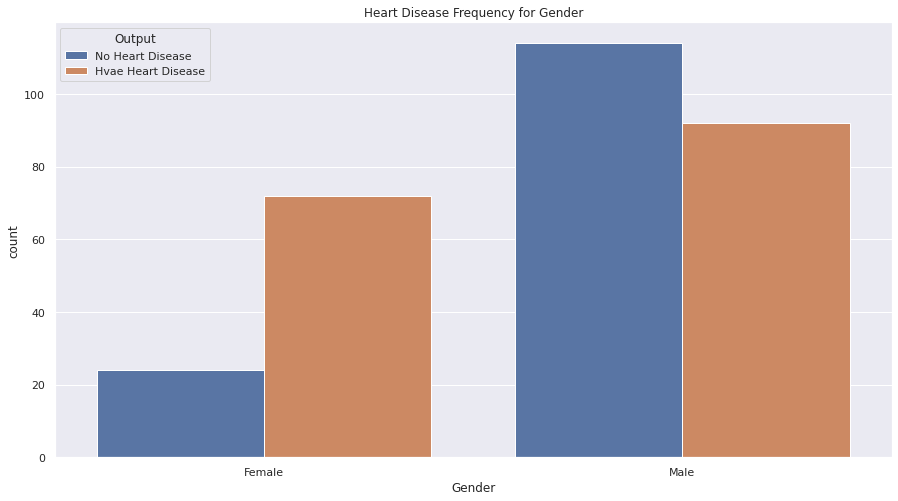

In [15]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = 'sex', hue = 'output', data = data)
ax.set_xticklabels(['Female', 'Male'])
ax.set_title('Heart Disease Frequency for Gender')
plt.legend(title = 'Output', loc = 'upper left', labels = ['No Heart Disease', 'Hvae Heart Disease'])
plt.xlabel('Gender')
plt.show()

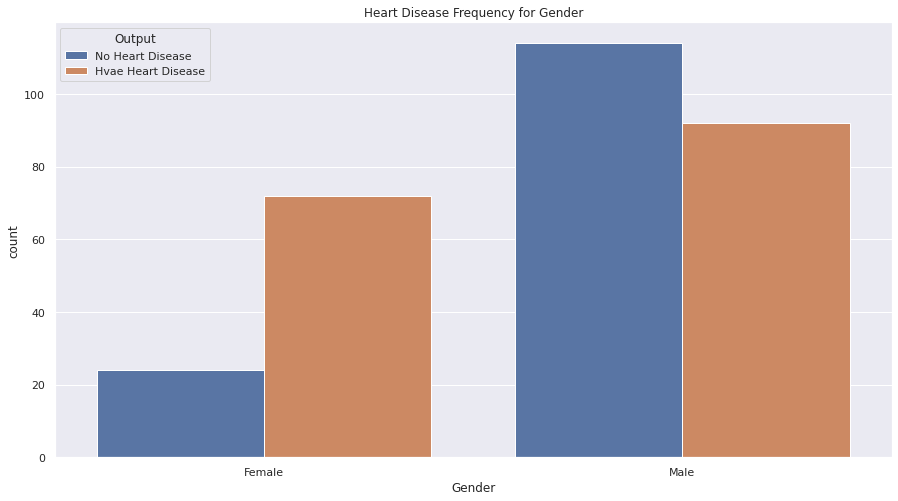

In [16]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = 'sex', hue = 'output', data = data)
ax.set_xticklabels(['Female', 'Male'])
ax.set_title('Heart Disease Frequency for Gender')
plt.legend(title = 'Output', loc = 'upper left', labels = ['No Heart Disease', 'Hvae Heart Disease'])
plt.xlabel('Gender')
plt.show()

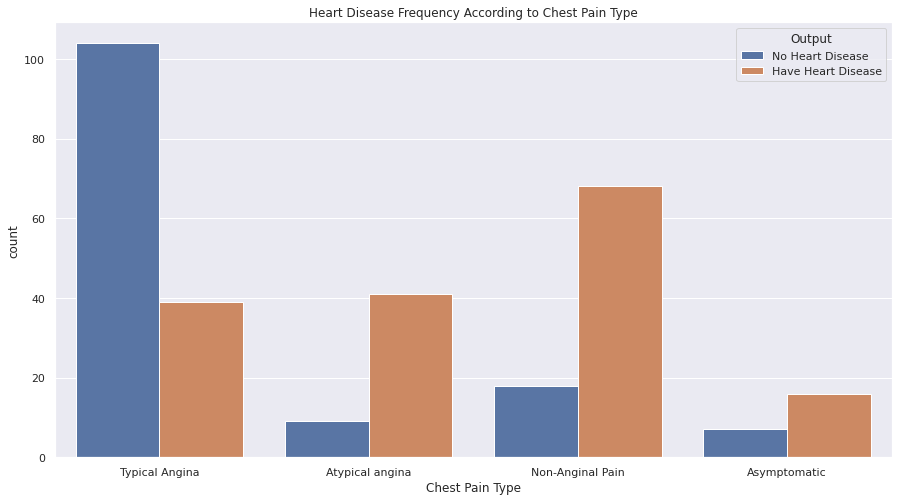

In [17]:
# plt.figure(figsize = (55, 10))
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = 'cp', hue = 'output', data = data)
ax.set_xticklabels(['Typical Angina', 'Atypical angina', 'Non-Anginal Pain', 'Asymptomatic'])
ax.set_title('Heart Disease Frequency According to Chest Pain Type')
plt.legend(title = 'Output', loc = 'upper right', labels = ['No Heart Disease', 'Have Heart Disease'])
plt.xlabel('Chest Pain Type')
plt.show()

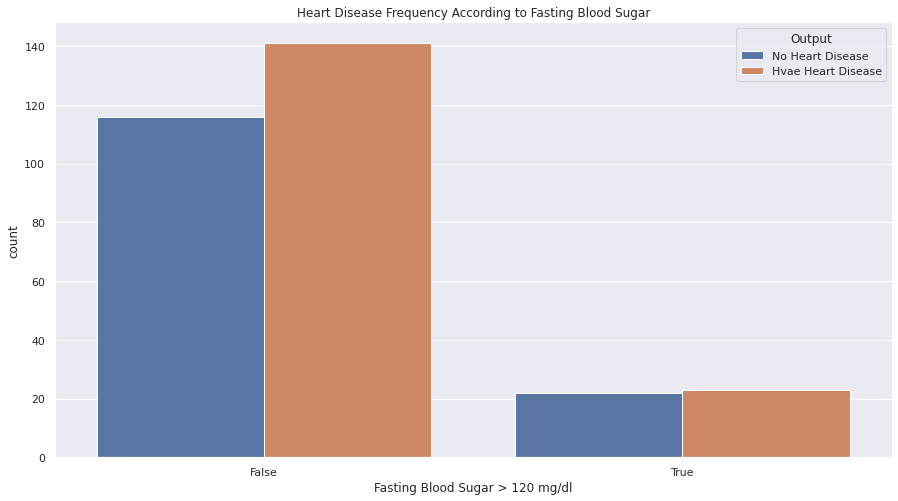

In [18]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = 'fbs', hue = 'output', data = data)
ax.set_xticklabels(['False', 'True'])
ax.set_title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.legend(title = 'Output', loc = 'upper right', labels = ['No Heart Disease', 'Hvae Heart Disease'])
plt.xlabel('Fasting Blood Sugar > 120 mg/dl')
plt.show()

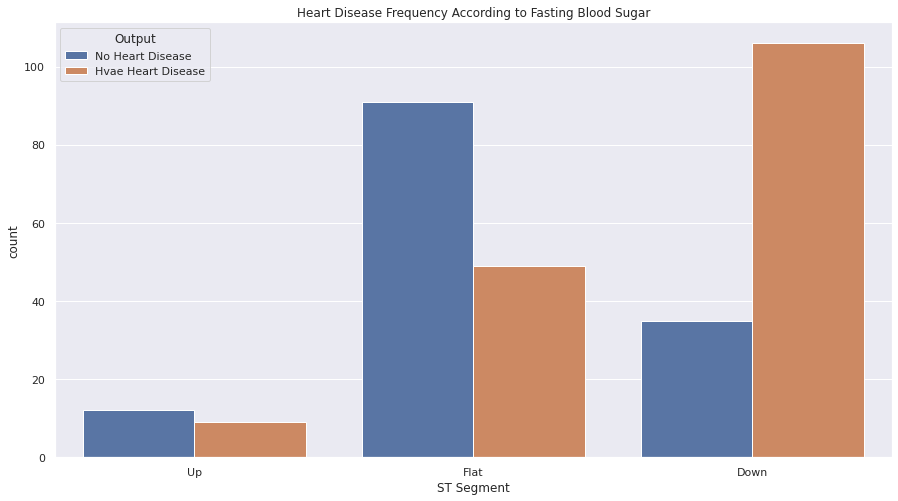

In [19]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = 'slp', hue = 'output', data = data)
ax.set_xticklabels(['Up', 'Flat', 'Down'])
ax.set_title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.legend(title = 'Output', loc = 'upper left', labels = ['No Heart Disease', 'Hvae Heart Disease'])
plt.xlabel('ST Segment')
plt.show()

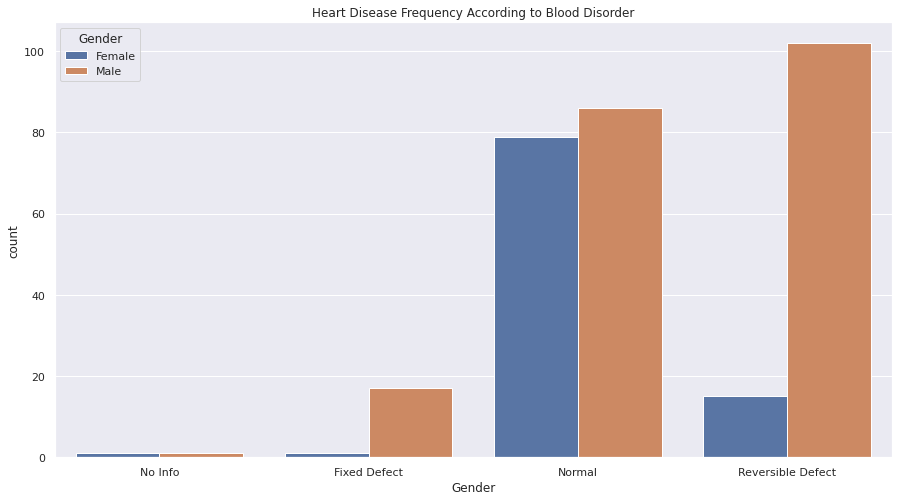

In [20]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = 'thall', hue = 'sex', data = data)
ax.set_xticklabels(['No Info', 'Fixed Defect', 'Normal', 'Reversible Defect'])
ax.set_title('Heart Disease Frequency According to Blood Disorder')
plt.legend(title = 'Gender', loc = 'upper left', labels = ['Female', 'Male'])
plt.xlabel('ST Segment')
plt.xlabel('Gender')
plt.show()

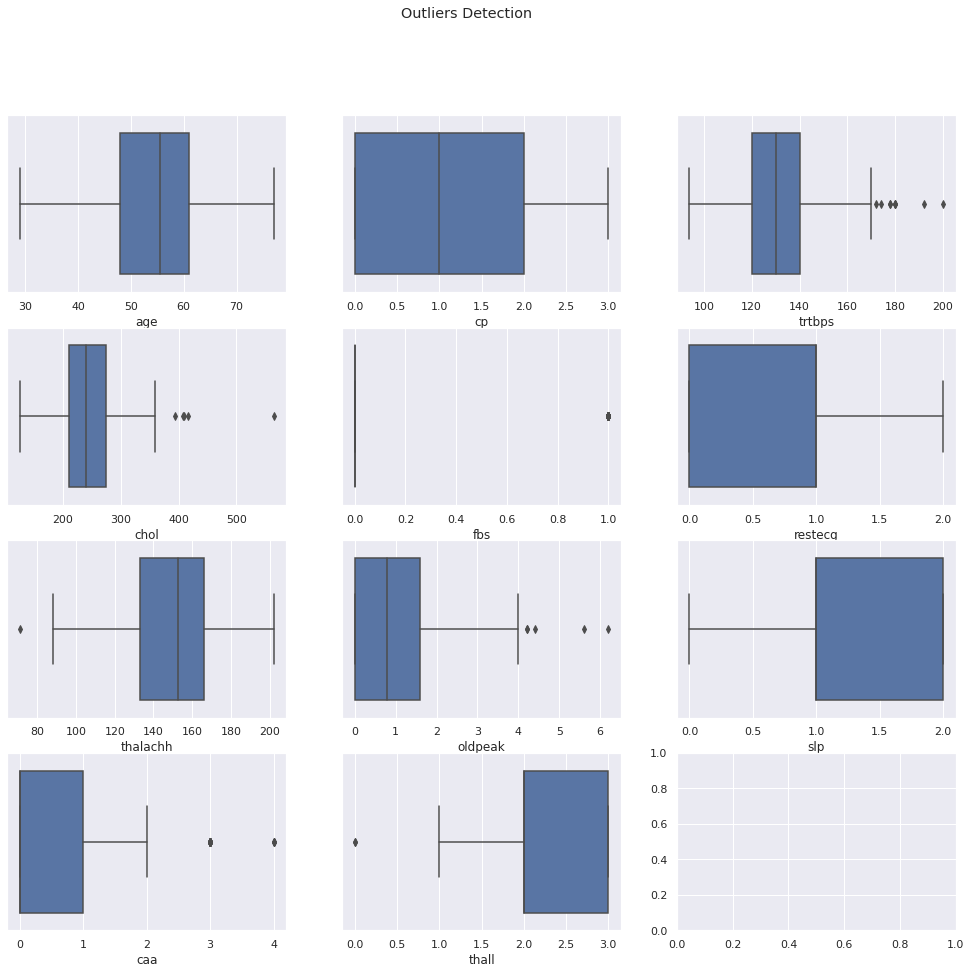

In [21]:
fig, axes = plt.subplots(4, 3, figsize = (17, 15))
fig.suptitle('Outliers Detection')
sns.boxplot(ax = axes[0,0], x = data['age'])
sns.boxplot(ax = axes[0,1], x = data['cp'])
sns.boxplot(ax = axes[0,2], x = data['trtbps'])
sns.boxplot(ax = axes[1,0], x = data['chol'])
sns.boxplot(ax = axes[1,1], x = data['fbs'])
sns.boxplot(ax = axes[1,2], x = data['restecg'])
sns.boxplot(ax = axes[2,0], x = data['thalachh'])
sns.boxplot(ax = axes[2,1], x = data['oldpeak'])
sns.boxplot(ax = axes[2,2], x = data['slp'])
sns.boxplot(ax = axes[3,0], x = data['caa'])
sns.boxplot(ax = axes[3,1], x = data['thall'])

In [22]:
# create a new dataframe for normalised dataset
normalised_data = data.copy()

In [23]:
columns_to_scale = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [24]:
ss = StandardScaler()
normalised_data[columns_to_scale] = ss.fit_transform(normalised_data[columns_to_scale])

In [25]:
# label data into feature data and target data
X = normalised_data.iloc[:, :-1]
y = normalised_data.iloc[:, -1]

In [26]:
# split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
# create instance of model
lr = LogisticRegression(random_state = 42) 

In [28]:
# train the model 
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [29]:
# get y predictions
y_pred = lr.predict(X_test)

In [30]:
# show performance metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [31]:
# print the confusion matrix
print (confusion_matrix(y_test, y_pred))

[[25  4]
 [ 6 26]]


In [32]:
# create instance of model
nb = GaussianNB()

In [33]:
# train the model
nb.fit(X_train, y_train)

GaussianNB()

In [34]:
# get y predictions
y_pred = nb.predict(X_test)

In [35]:
# print performance report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [36]:
# print the confusion matrix
print (confusion_matrix(y_test, y_pred))

[[27  2]
 [ 5 27]]


In [37]:
# create an instance
xgb = XGBClassifier(random_state = 42)

In [38]:
# train the model
xgb.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [39]:
# get y predictions
y_pred = xgb.predict(X_test)

In [40]:
# print out the accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [41]:
# print the confusion matrix
print (confusion_matrix(y_test, y_pred))

[[26  3]
 [ 6 26]]


In [42]:
# create an instance of model
rf = RandomForestClassifier(random_state=42, n_estimators=500)

In [43]:
# fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [44]:
# get y predictions
y_pred = rf.predict(X_test)

In [45]:
# show accuracy report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [46]:
# print the confusion matrix
print (confusion_matrix(y_test, y_pred))

[[26  3]
 [ 4 28]]


In [47]:
# create an instance
dt = DecisionTreeClassifier(random_state = 42)

In [48]:
# train model 
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
# get y predictions
y_pred = dt.predict(X_test)

In [50]:
# print performance report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.85      0.69      0.76        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [51]:
# print the confusion matrix
print (confusion_matrix(y_test, y_pred))

[[25  4]
 [10 22]]


In [52]:
# create instance of model
knn = KNeighborsClassifier()

In [55]:
# train model 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
# get y predictions
y_pred = knn.predict(X_test)

In [57]:
# print the accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [58]:
# print the confusion matrix
print (confusion_matrix(y_test, y_pred))

[[25  4]
 [ 4 28]]


In [59]:
# get instance of the model
svm = SVC(random_state = 42)

In [60]:
# train the model 
svm.fit(X_train, y_train)

SVC(random_state=42)

In [61]:
# get y predictions
y_pred = svm.predict(X_test)

In [62]:
# show performance report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [63]:
# print the confusion matrix
print (confusion_matrix(y_test, y_pred))

[[25  4]
 [ 3 29]]
